<a href="https://colab.research.google.com/github/HiteshPandharkar/Algorithms-From-Scratch/blob/main/LinReg_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing multiple linear regression with numpy using ordinary least squares.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Concept OLS :-

### The ordinary least squares figures out the coefficients and the constant term using a nice analytical equation to minimize the squared error for that dataset.

### The dataset used here is boston housing dataset and the student score dataset.

### The housing dataset has 13 independant and 1 dependant variable. 
### The student score has 1 independant and 1 dependant variable.

In [ ]:
data = load_boston(return_X_y=True)     #Loading boston dataset.

x_b = data[0][0: 450]
y_b = data[1][0: 450]

x_test_b = data[0][450: ]
y_test_b = data[1][450: ]


'''data = load_boston()

x_b = data['data'][0: 450]
y_b = data['target'][0: 450]'''

"data = load_boston()\n\nx_b = data['data'][0: 450]\ny_b = data['target'][0: 450]"

In [ ]:
data = pd.read_csv('student_scores.csv') #Loading student dataset.

x_s = data.iloc[:, 0].values.reshape(-1, 1)
y_s = data.iloc[:, 1]

In [ ]:
class LinearRegression :

  def __init__(self) :

    self.coeff = 0                  #Coefficients
    self.intercept = np.array([])   #Constant 

  def fit(self, x, y) :

    #Fit function will contain the calculation of the coefficients and constant term for the dataset.

    ones = np.ones(len(x)).reshape(len(x), 1)
    x = np.concatenate((ones, x), axis=1)

    self.x = x
    self.y = y

    xtx = np.dot(self.x.T, self.x)
    xtx_inv = np.linalg.inv(xtx)
    xty = np.dot(self.x.T, self.y)
    self.b_hat = np.dot(xtx_inv, xty)

    y_hat = np.dot(x, self.b_hat)

    train_loss = .5*np.sum((y_hat-y)**2)

    self.coeff = np.around(self.b_hat[1: ], decimals=6)
    self.intercept = self.b_hat[0]

  def predict(self, x_test) :

    #The predict function will do the prediction on unseen data.

    ones = np.ones(len(x_test)).reshape(len(x_test), 1)
    x_test = np.concatenate((ones, x_test), axis=1)

    self.y_pred = np.dot(x_test, self.b_hat)

    return self.y_pred

In [ ]:
model_b = LinearRegression()
model_b.fit(x_b, y_b)

In [ ]:
model_b.intercept

34.26122511495987

In [ ]:
model_b.coeff

array([-1.1270600e-01,  4.8468000e-02,  3.5162000e-02,  2.4303670e+00,
       -1.7155591e+01,  3.9293770e+00,  1.0595000e-02, -1.4059840e+00,
        3.7231700e-01, -1.5434000e-02, -9.0336100e-01,  9.7400000e-03,
       -5.5163000e-01])

In [ ]:
model_b.predict(x_test_b)

array([16.93342847, 20.02045317, 19.1112216 , 23.22511636, 15.67053396,
       16.16461608, 12.94871109, 13.10761941, 17.6319346 , 19.03284579,
       19.59255106, 20.77045231, 20.32972514, 23.18351143, 20.68319592,
       18.0040013 , 14.64560774, 17.27282806, 17.13977735, 18.68551487,
       20.60338383, 23.55507294, 22.87962378, 26.04862777, 16.72644386,
       16.36479094, 21.00709718, 11.6612751 , 19.64804461, 22.3241981 ,
       23.86289088, 27.72777956, 29.28276029, 21.24700039, 19.56624682,
       22.57946369, 20.10876414, 21.5593847 , 10.86871125,  7.10200759,
        2.34094092, 12.89668156, 15.06381197, 20.29041819, 20.14661342,
       16.17245839, 13.60940848, 18.92607466, 21.08818519, 18.21312845,
       20.37078103, 23.66927765, 22.53513428, 28.11477396, 26.56785292,
       22.58084479])

In [ ]:
model_s = LinearRegression()
model_s.fit(x_s, y_s)

In [ ]:
model_s.intercept

2.483673405373156

In [ ]:
model_s.coeff

array([9.775803])

# Implementing multiple linear regression using statsmodel package.

In [ ]:
#from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm 

In [ ]:
x_b = sm.add_constant(x_b)

In [ ]:
result = sm.OLS(y_b,x_b).fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     96.22
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          4.30e-119
Time:                        18:01:35   Log-Likelihood:                -1347.3
No. Observations:                 450   AIC:                             2723.
Df Residuals:                     436   BIC:                             2780.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2612      5.497      6.232      0.0

In [ ]:
x_test_b = sm.add_constant(x_test_b)

In [ ]:
result.predict(x_test_b)

array([16.93342847, 20.02045317, 19.1112216 , 23.22511636, 15.67053396,
       16.16461608, 12.94871109, 13.10761941, 17.6319346 , 19.03284579,
       19.59255106, 20.77045231, 20.32972514, 23.18351143, 20.68319592,
       18.0040013 , 14.64560774, 17.27282806, 17.13977735, 18.68551487,
       20.60338383, 23.55507294, 22.87962378, 26.04862777, 16.72644386,
       16.36479094, 21.00709718, 11.6612751 , 19.64804461, 22.3241981 ,
       23.86289088, 27.72777956, 29.28276029, 21.24700039, 19.56624682,
       22.57946369, 20.10876414, 21.5593847 , 10.86871125,  7.10200759,
        2.34094092, 12.89668156, 15.06381197, 20.29041819, 20.14661342,
       16.17245839, 13.60940848, 18.92607466, 21.08818519, 18.21312845,
       20.37078103, 23.66927765, 22.53513428, 28.11477396, 26.56785292,
       22.58084479])

In [ ]:
x_sm = sm.add_constant(x_s) #Using a slightly different naming convention.

In [ ]:
result_s = sm.OLS(y_s,x_sm).fit()

In [ ]:
print(result_s.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           9.13e-17
Time:                        18:02:02   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

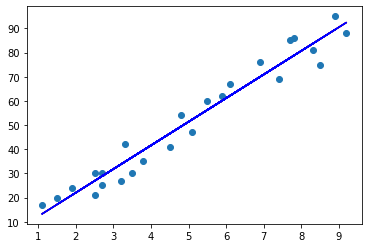

In [ ]:
plt.scatter(x_s, y_s)
plt.plot(x_s, model_s.predict(x_s), color='red')
plt.plot(x_s, result_s.predict(x_sm), color='blue')
plt.show()